# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Hill HP 2015\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


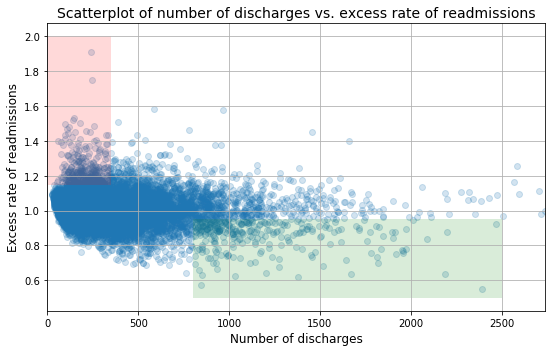

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [5]:
# Your turn
# My turn:

A) From section A of the preliminary report, I agree it appears there is a very slight down trend of readmissions with increased discharges.  However, in the datacamp course on linear regression, it was noted that the actual regression line is usually less sloped than it appears to be.  The area shaded red shows 2 data points that most likely are outliers and should be researched to ensure correctly recorded data, and otherwise appears to show a little higher concentration of data, but not that much greater.  The area shaded green appears to contain roughly the same number of data points as the area above the green box, suggesting almost as many data points have higher than average readmission rate with that many discharges.  In section B, drawing attention to the data less than 100 and greater than 1000 ignores the bulk of the data, which lies in between those discharge rates, suggesting the report is slightly misleading by concentrating on the minority of data.  In section C, number of discharges is not necessarily a good proxy for hospital capacity as the report suggests.  That data probably should be collected separately.  Also, "significant" is not defined.  In section D, small hospitals are defined as discharge rate less than 300, but in section B, the data inspected was less than 100.  Those 2 boundaries should be identical for the report to be meaningful.  In the background, a hospital's "expected" readmission rate was calculated as an average of similar hospitals.  Are all the hospitals in this report and what were the exact criteria for being similar?  Also, from the code, the first 80 and the last 3 hospital data points were not plotted.  That needs to be accounted for or defended.  So, I initally disagree with the analysis and recommendations, but further analysis should be conducted to confirm or deny my initial thought.

B) 1) An appropriate null hypothesis would be the difference between the mean rate of readmissions for small hospitals (< 100) and large hospitals (> 1000) is 0.

In [6]:
# Check the data

clean_hospital_read_df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [7]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [8]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int32
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [9]:
clean_hospital_read_df[81:-3].describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11494.000000,11494.000000,0.0,11494.000000,11494.000000,11494.000000,11494.000000
mean,257582.184792,364.313729,NaN,1.007541,17.986193,17.867522,63.539064
std,154285.620670,299.546395,NaN,0.091912,5.484839,5.238526,59.027926
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110129.000000,159.250000,NaN,0.952700,16.300000,16.600000,24.000000
50%,250042.000000,281.000000,NaN,1.003550,19.050000,19.000000,45.000000
75%,390039.000000,474.000000,NaN,1.058075,21.500000,21.400000,82.000000
max,670082.000000,2740.000000,NaN,1.909500,32.800000,28.000000,623.000000


In [10]:
test_data = clean_hospital_read_df[81:-3]

In [11]:
# Split the test data into small and large using the definition from the report

test_data_small = test_data[test_data['Number of Discharges'] <= 100]
test_data_large = test_data[test_data['Number of Discharges'] >= 1000]

test_data_small_mean = np.mean(test_data_small['Excess Readmission Ratio'])
test_data_large_mean = np.mean(test_data_large['Excess Readmission Ratio'])

print('Mean rate of readmission for small hospitals',test_data_small_mean)
print('Mean rate of readmission for large hospitals',test_data_large_mean)

Mean rate of readmission for small hospitals 1.0220883892068686
Mean rate of readmission for large hospitals 0.979070281995662


In [12]:
# Run the Scipy 2-sample t-test for mean difference
import scipy
from scipy import stats

t2_test_tstat, t2_test_pval = scipy.stats.ttest_ind(test_data_small['Excess Readmission Ratio'],test_data_large['Excess Readmission Ratio'],equal_var=False)

print('t-statistic from mean difference is',t2_test_tstat)
print('p-value from mean difference is',t2_test_pval)

t-statistic from mean difference is 7.42121882992
p-value from mean difference is 4.48982570266e-13


2) The computed p-value is 4.5e-13, very small, so the null hypothesis, that there is no difference between the mean rate of readmission between small and large hospitals, can be rejected.

An alternate hull hypothesis is the correlation between mean rate of readmissions and number of discharges is 0.

In [13]:
from numpy import random

corr_mat = np.corrcoef(test_data['Number of Discharges'],test_data['Excess Readmission Ratio'])
obs_corr = corr_mat[0,1]

test_results = np.empty(10000)
test_means = np.empty(len(test_data))

for i in range(10000):
    test_means = np.random.permutation(test_data['Excess Readmission Ratio'])
    test_corr_mat = np.corrcoef(test_data['Number of Discharges'],test_means)
    test_results[i] = test_corr_mat[0,1]
    
corr_p_val = sum(test_results == 0) / 10000
print('Observed correlation',obs_corr)
print('p-value from permutation test',corr_p_val)

Observed correlation -0.0930955428759
p-value from permutation test 0.0


So, the extremely small p-value here suggests the alternate hull hypothesis can be rejected as well.

In [14]:
import statsmodels
from statsmodels import stats
from statsmodels.stats import weightstats
from statsmodels.stats.weightstats import DescrStatsW

low_bound,up_bound = statsmodels.stats.weightstats.DescrStatsW(test_data['Excess Readmission Ratio']).tconfint_mean(alpha=0.01, alternative='two-sided')
margin_error = 2.5758 * np.std(test_data['Excess Readmission Ratio']) / np.sqrt(len(test_data))

print('Observed mean rate of readmission',np.mean(test_data['Excess Readmission Ratio']))
print('99% Confidence Interval for mean rate of readmission [{} - {}]'.format(low_bound,up_bound))
print('99% Margin of Error is +/-',margin_error)

Observed mean rate of readmission 1.007540917000168
99% Confidence Interval for mean rate of readmission [1.0053322824719397 - 1.009749551528408]
99% Margin of Error is +/- 0.00220814654338


3) A 0.01 statistically significant difference then is any mean greater than 1.011957.  The observed mean for small hospitals was calculated earlier to be 1.022088, which is larger than the 99% significance margin.

4) Statistical significance refers to a test run on data that produces a p-value, which can then be compared to a predetermined value, often 0.05.  When the p-value is less than the cutoff value, the data is said to have statistically significant difference.  Practical significance refers to whether or not that statistical difference has any real world impact.  For instance, if a weight loss drug produces statistically significant differences than from not using it, and the difference in using the drug amounts to only a few pounds, it still may not be practical to use the drug, given price or availability or other factors.  In this particular report, the cost of improving or consolidating the small hospitals may not be practical to overcome the relatively small correlation.  It may be helpful to study those costs before making a final recommendation.

5) I would say the primary advantage of the scatter plot is being able to display all the data visually, with the exception of  the extreme outliers from very large hospitals they chose to omit.  The primary disadvantage is the lack of ability to distinguish which points or clusters of points are important and the perception of a correlation that is greater than reality.  The linear correlation appears quite negative when really it's only slightly negative.

In [15]:
test_data_50 = test_data['Excess Readmission Ratio'][test_data['Number of Discharges'] <= 50]
test_data_100 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 100) & (test_data['Number of Discharges'] > 50)]
test_data_150 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 150) & (test_data['Number of Discharges'] > 100)]
test_data_200 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 200) & (test_data['Number of Discharges'] > 150)]
test_data_250 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 250) & (test_data['Number of Discharges'] > 200)]
test_data_300 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 300) & (test_data['Number of Discharges'] > 250)]
test_data_350 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 350) & (test_data['Number of Discharges'] > 300)]
test_data_400 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 400) & (test_data['Number of Discharges'] > 350)]
test_data_450 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 450) & (test_data['Number of Discharges'] > 400)]
test_data_500 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 500) & (test_data['Number of Discharges'] > 450)]
test_data_600 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 600) & (test_data['Number of Discharges'] > 500)]
test_data_700 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 700) & (test_data['Number of Discharges'] > 600)]
test_data_800 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 800) & (test_data['Number of Discharges'] > 700)]
test_data_900 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 900) & (test_data['Number of Discharges'] > 800)]
test_data_1000 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 1000) & (test_data['Number of Discharges'] > 900)]
test_data_1250 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 1250) & (test_data['Number of Discharges'] > 1000)]
test_data_1500 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 1500) & (test_data['Number of Discharges'] > 1250)]
test_data_1750 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 1750) & (test_data['Number of Discharges'] > 1500)]
test_data_2000 = test_data['Excess Readmission Ratio'][(test_data['Number of Discharges'] <= 2000) & (test_data['Number of Discharges'] > 1750)]
test_data_top = test_data['Excess Readmission Ratio'][test_data['Number of Discharges'] > 2000]
data_order = [test_data_50,test_data_100,test_data_150,test_data_200,test_data_250,test_data_300,test_data_350,test_data_400,test_data_450,test_data_500,test_data_600,test_data_700,test_data_800,test_data_900,test_data_1000,test_data_1250,test_data_1500,test_data_1750,test_data_2000,test_data_top,]

[[Text(0,0,'<50'),
  Text(0,0,'50-100'),
  Text(0,0,'100-150'),
  Text(0,0,'150-200'),
  Text(0,0,'200-250'),
  Text(0,0,'250-300'),
  Text(0,0,'300-350'),
  Text(0,0,'350-400'),
  Text(0,0,'400-450'),
  Text(0,0,'450-500'),
  Text(0,0,'500-600'),
  Text(0,0,'600-700'),
  Text(0,0,'700-800'),
  Text(0,0,'800-900'),
  Text(0,0,'900-1000'),
  Text(0,0,'1000-1250'),
  Text(0,0,'1250-1500'),
  Text(0,0,'1500-1750'),
  Text(0,0,'1750-2000'),
  Text(0,0,'>2000')]]

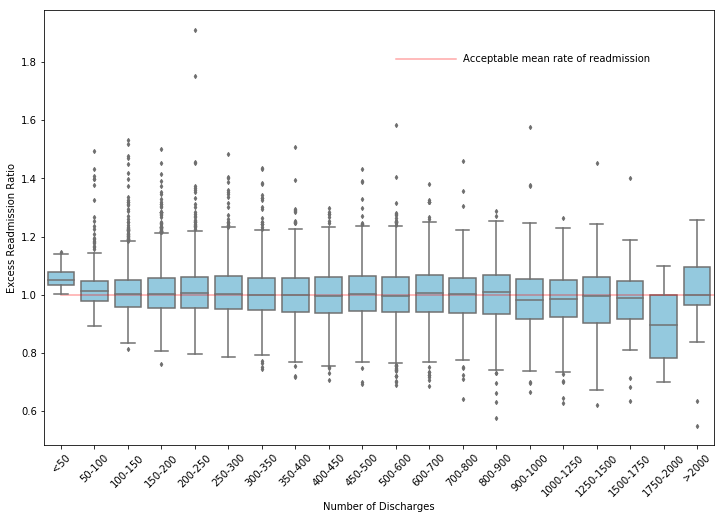

In [84]:
import seaborn as sns

plt.ylabel('Excess Readmission Ratio')
plt.xlabel('Number of Discharges')
plt.rcParams['figure.figsize'] = (12,8)
xlabels = ['<50','50-100','100-150','150-200','200-250','250-300','300-350','350-400','400-450','450-500','500-600','600-700','700-800','800-900','900-1000','1000-1250','1250-1500','1500-1750','1750-2000','>2000']
plt.xticks(rotation='45')
plt.plot([0,20],[1,1],color='red',alpha=0.35)
plt.plot([10,11.8],[1.81,1.81],color='red',alpha=0.35)
plt.text(12,1.8,'Acceptable mean rate of readmission')
g = sns.boxplot(data=data_order,color='skyblue',fliersize=3)
g.set(xticklabels=xlabels)

5b) In this graph, I used consecutive box plots for increasing number of discharges.  From this, it is clear than only hospitals with very small discharge rates (< 50) have an increased mean rate of readmission, and oddly, the group of hospitals just less than the highest discharge rate (between 1750 and 2000) have a decreased mean rate of readmission.  Also, within almost every group of hospitals, there are outliers with an increased mean rate of readmission.  There appear to be more outliers for discharge rates under 350, so that seems like an area to examine and look for ways to improve or consolidate, per the original report.